In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('movies_metadata.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
raw_data = pd.DataFrame(data, columns=['original_title', 'budget'])
raw_data.describe()

,original_title,budget
count,45466,45466
unique,43373,1226
top,Alice in Wonderland,0
freq,8,36573


In [57]:
print('Mean of budget:',pd.to_numeric(raw_data['budget'], errors='coerce').mean())

Mean of budget: 4224578.813474693


In [58]:
print('Variance of budget:',pd.to_numeric(raw_data['budget'], errors='coerce').var())

Variance of budget: 303600398058910.2


In [59]:
clean_data = data.query("budget != \'0\'")
print ('Cleaned data Mean:', pd.to_numeric(clean_data["budget"], errors = 'coerce').mean())
print ('Cleaned Data Variance:',pd.to_numeric(clean_data["budget"], errors = 'coerce').var())

Cleaned data Mean: 21604277.457480315
Cleaned Data Variance: 1177219164512387.5


In [60]:
rat_data = pd.read_csv('ratings.csv')
rat_data.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


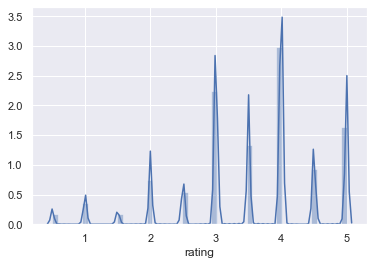

In [61]:
data_2 = pd.DataFrame(rat_data, columns=['movieId','rating'])
x = data_2.rating
sns.set(color_codes=True)
sns.distplot(x)

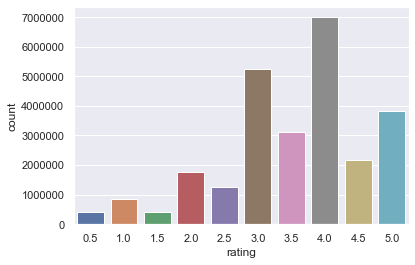

In [62]:
sns.countplot(x='rating', data=data_2)

In [63]:
rat = {'0.5':0, '1.0':0,'1.5':0,'2.0':0,'2.5':0,'3.0':0,'3.5':0,'4.0':0,'4.5':0,'5.0':0}
for x in data_2.rating:
    if x == 0.5:
        rat['0.5'] += 1
    elif x ==  1.0:
        rat['1.0'] += 1
    elif x ==  1.5:
        rat['1.5'] += 1
    elif x ==  2.0:
        rat['2.0'] += 1
    elif x ==  2.5:
        rat['2.5'] += 1
    elif x ==  3.0:
        rat['3.0'] += 1
    elif x == 3.5:
        rat['3.5'] += 1
    elif x == 4.0:
        rat['4.0'] += 1
    elif x == 4.5:
        rat['4.5'] += 1
    elif x == 5.0:
        rat['5.0'] += 1
            
print(rat)

{'0.5': 404897, '1.0': 843310, '1.5': 403607, '2.0': 1762440, '2.5': 1255358, '3.0': 5256722, '3.5': 3116213, '4.0': 6998802, '4.5': 2170441, '5.0': 3812499}


<BarContainer object of 10 artists>

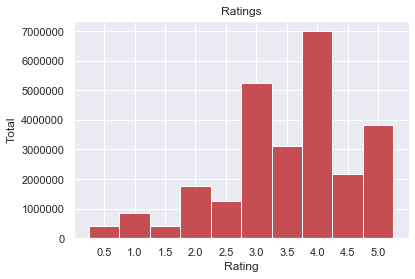

In [65]:
plt.title ("Ratings")
plt.xlabel ('Rating')
plt.ylabel ('Total')
plt.bar (rat.keys(), rat.values(), 1, color='r')

In [66]:
summ = 0
for key in rat:
    summ += rat[key] 
print('Dispersion')
for key in rat:
    print(key,':','%.2f' %( (rat[key]/summ)*100),'%')

Dispersion
0.5 : 1.56 %
1.0 : 3.24 %
1.5 : 1.55 %
2.0 : 6.77 %
2.5 : 4.82 %
3.0 : 20.20 %
3.5 : 11.97 %
4.0 : 26.89 %
4.5 : 8.34 %
5.0 : 14.65 %


In [67]:
ratingLabels = []
ratingTotals = []
for key in rat:
    ratingLabels.append(key)
    ratingTotals.append(rat[key])
print(ratingLabels)
print(ratingTotals)

['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']
[404897, 843310, 403607, 1762440, 1255358, 5256722, 3116213, 6998802, 2170441, 3812499]


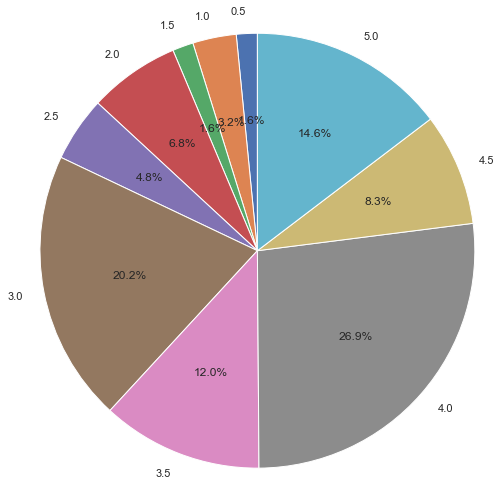

In [45]:
plt.pie(ratingTotals, labels=ratingLabels, startangle=90, autopct='%.1f%%',radius=2.5)
plt.show()

In [38]:
data2 = pd.read_csv('h1b_kaggle.csv')
data2.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [40]:
df = data2.dropna(subset=['YEAR'])
raw_data2 =pd.to_numeric(df['YEAR'], errors='coerce')
raw_data3 = pd. DataFrame(raw_data2, columns = ["YEAR"])


raw_data3.head()

,YEAR
0,2016
1,2016
2,2016
3,2016
4,2016


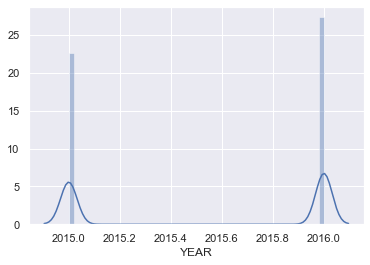

In [41]:
x = raw_data3['YEAR']
sns.set(color_codes=True)
sns.distplot(x)

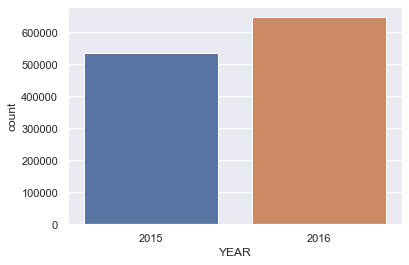

In [42]:
sns.countplot(x='YEAR', data=raw_data3)

In [70]:
year = {'2015':0, '2016':0}
for x in data2.YEAR:
    if x == 2015:
        year['2015'] += 1
    elif x ==  2016:
        year['2016'] += 1

            
print(year)

{'2015': 536685, '2016': 647803}


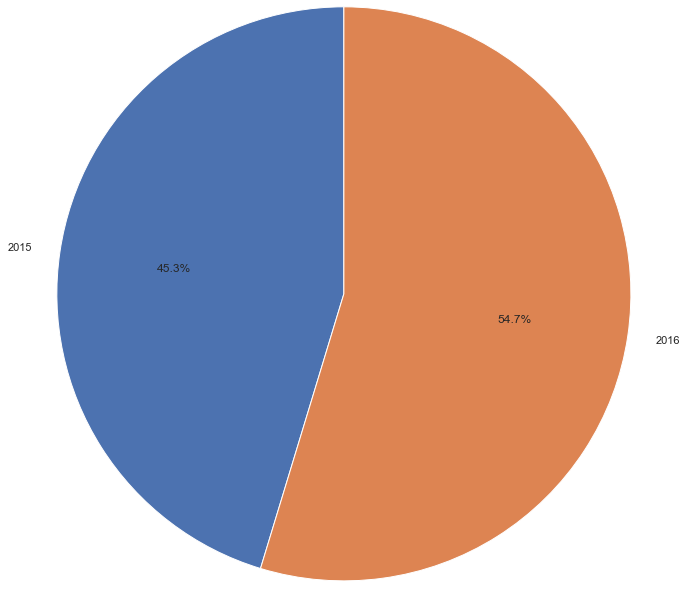

In [72]:
plt.pie(year.values(), labels=year.keys(), startangle=90, autopct='%.1f%%',radius=3.3)
plt.show()